In [2]:
import os
from io import StringIO
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 微軟正黑體（Windows）
plt.rcParams['axes.unicode_minus'] = False

In [3]:
url = "https://raw.githubusercontent.com/ebb351/NBA-Team-Statistics-Interactive-Visualization/refs/heads/main/nba_team_stats_00_to_23.csv"
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data)
df

,teamstatspk,Team,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Boston Celtics,82,64,18,0.780,3966,9887,3601,7396,...,3799,2207,979,557,538,304,1326,1416,930,2023-24
1,1,Denver Nuggets,82,57,25,0.695,3941,9418,3610,7279,...,3643,2415,1036,585,456,394,1489,1467,431,2023-24
2,2,Oklahoma City Thunder,82,57,25,0.695,3961,9847,3653,7324,...,3447,2223,1039,694,538,419,1545,1548,608,2023-24
3,3,Minnesota Timberwolves,82,56,26,0.683,3961,9264,3383,6974,...,3577,2184,1162,647,497,371,1544,1630,529,2023-24
4,4,LA Clippers,82,51,31,0.622,3941,9481,3473,7108,...,3523,2097,1078,640,413,384,1519,1537,269,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,711,Atlanta Hawks,82,25,57,0.305,3946,7459,2876,6668,...,3518,1559,1368,634,387,513,1863,7,-427,2000-01
712,712,Vancouver Grizzlies,82,23,59,0.280,3956,7522,2870,6539,...,3325,1899,1291,586,359,476,1733,5,-470,2000-01
713,713,Washington Wizards,82,19,63,0.232,3936,7645,2833,6453,...,3386,1647,1391,630,383,511,1913,9,-547,2000-01
714,714,Golden State Warriors,82,17,65,0.207,3956,7584,2937,7175,...,3730,1788,1301,742,410,493,1727,6,-742,2000-01


In [4]:
print(df['Team'].unique())
print('\n')
print(pd.crosstab(index=df['Team'], columns='count'))

for i in range(len(df)):
    if df.loc[i, 'Team'] == 'New Jersey Nets':
        df.loc[i, 'Team'] = 'Brooklyn Nets'
    elif df.loc[i, 'Team'] == 'Charlotte Bobcats':
        df.loc[i, 'Team'] = 'Charlotte Hornets'
    elif df.loc[i, 'Team'] == 'Los Angeles Clippers':
        df.loc[i, 'Team'] = 'LA Clippers'
    elif df.loc[i, 'Team'] == 'Vancouver Grizzlies':
        df.loc[i, 'Team'] = 'Memphis Grizzlies'
    elif df.loc[i, 'Team'] == 'New Orleans Hornets' or df.loc[i, 'Team'] == 'New Orleans/Oklahoma City Hornets':
        df.loc[i, 'Team'] = 'New Orleans Pelicans'
    elif df.loc[i, 'Team'] == 'Seattle SuperSonics':
        df.loc[i, 'Team'] = 'Oklahoma City Thunder'

['Boston Celtics' 'Denver Nuggets' 'Oklahoma City Thunder'
 'Minnesota Timberwolves' 'LA Clippers' 'Dallas Mavericks'
 'New York Knicks' 'Milwaukee Bucks' 'New Orleans Pelicans' 'Phoenix Suns'
 'Cleveland Cavaliers' 'Indiana Pacers' 'Los Angeles Lakers'
 'Orlando Magic' 'Philadelphia 76ers' 'Golden State Warriors' 'Miami Heat'
 'Sacramento Kings' 'Houston Rockets' 'Chicago Bulls' 'Atlanta Hawks'
 'Brooklyn Nets' 'Utah Jazz' 'Memphis Grizzlies' 'Toronto Raptors'
 'San Antonio Spurs' 'Charlotte Hornets' 'Portland Trail Blazers'
 'Washington Wizards' 'Detroit Pistons' 'Los Angeles Clippers'
 'Charlotte Bobcats' 'New Orleans Hornets' 'New Jersey Nets'
 'Seattle SuperSonics' 'New Orleans/Oklahoma City Hornets'
 'Vancouver Grizzlies']


col_0                              count
Team                                    
Atlanta Hawks                         24
Boston Celtics                        24
Brooklyn Nets                         12
Charlotte Bobcats                     10
Charlotte Hor

In [5]:
# 移除非數值欄位
df_numeric = df.drop(columns=['teamstatspk', 'Team', 'season'])

# 特徵（X）與目標（y）
X = df_numeric[['assists']]
y = df_numeric['points']

slope: 2.5741
intercept: 3574.1129
MSE: 213659.8031
R^2: 0.6353


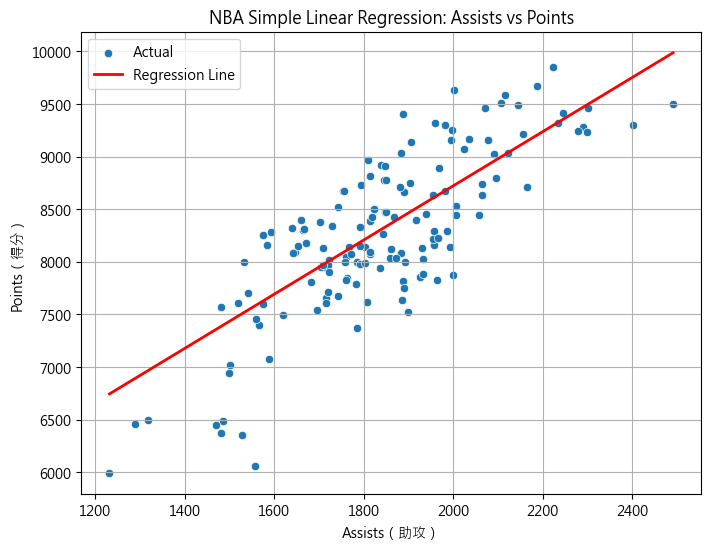

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 依據 X_test 的 'assists' 進行排序
sorted_idx = X_test['assists'].to_numpy().argsort()
sorted_x = X_test['assists'].iloc[sorted_idx]
sorted_y = y_pred[sorted_idx]

# 輸出模型參數
print(f"slope: {model.coef_[0]:.4f}")
print(f"intercept: {model.intercept_:.4f}")

# 評估模型表現
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

# 繪製回歸線
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['assists'], y=y_test, label="Actual")
plt.plot(sorted_x, sorted_y, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Assists（助攻）")
plt.ylabel("Points（得分）")
plt.title("NBA Simple Linear Regression: Assists vs Points")
plt.legend()
plt.grid(True)
plt.show()

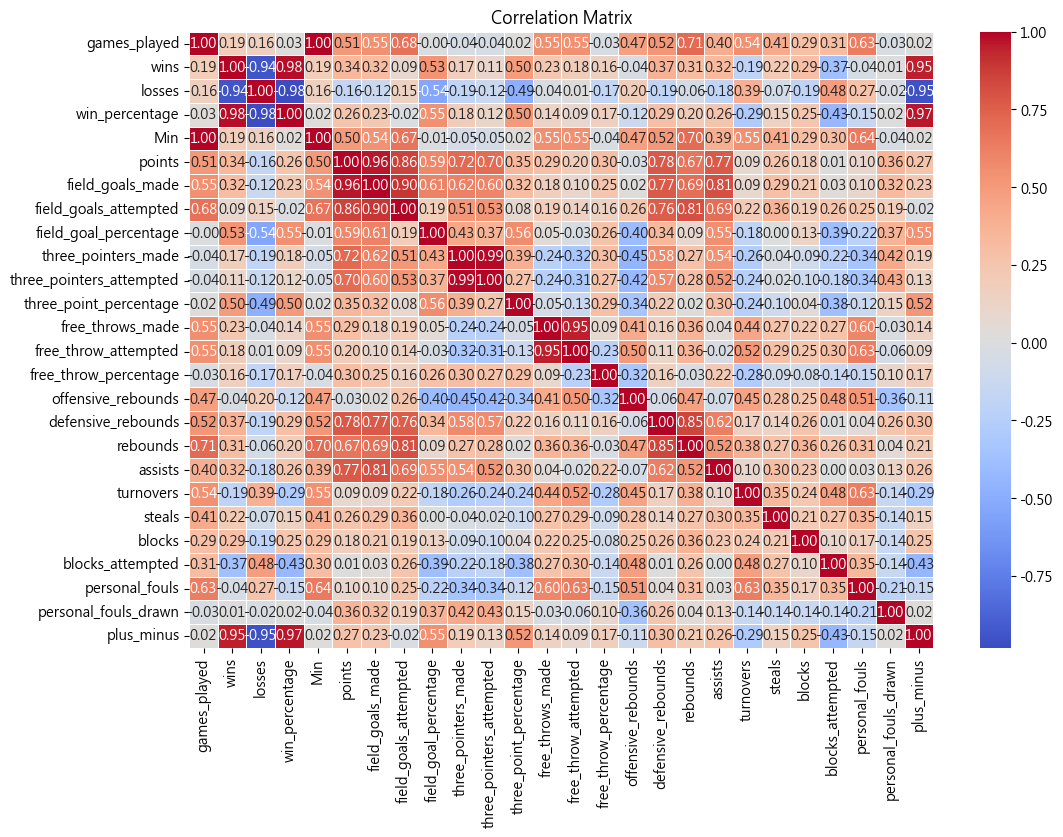

模型評估結果:
MSE: 19407.2363
R² score: 0.9669
Adjusted R² score: 0.9644


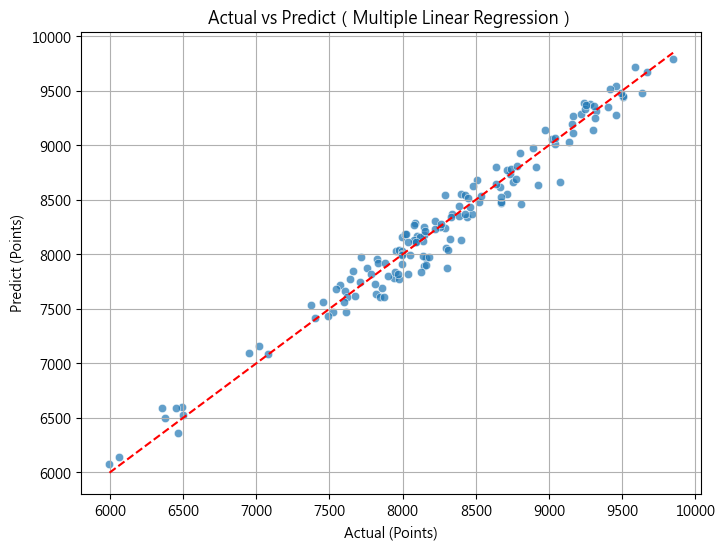

In [13]:
 #繪製熱力圖看所有數值欄位間的相關性
plt.figure(figsize=(12, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 計算與目標變數 points 的相關係數
corr_with_points = df_numeric.corr()['points'].drop('points').sort_values(ascending=False)

# 篩選相關性大於 0.5 或小於 -0.5 的特徵變數
selected_features = corr_with_points[abs(corr_with_points) > 0.5].index.tolist()
#print("選出的特徵變數：", selected_features)

# 建立特徵與目標
X = df_numeric[selected_features]
y = df_numeric['points']

# 標準化特徵
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 分割資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測測試集
y_pred = model.predict(X_test)

# 輸出模型參數
#print("迴歸係數:")
#for feature, coef in zip(selected_features, model.coef_):
#    print(f"{feature}: {coef:.4f}")
#print(f"截距: {model.intercept_:.4f}")

# 評估模型表現
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# 顯示結果
print("模型評估結果:")
print(f"MSE: {mse:.4f}")
print(f"R² score: {r2:.4f}")
print(f"Adjusted R² score: {adjusted_r2:.4f}")

# 預測 vs 實際 視覺化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual (Points)")
plt.ylabel("Predict (Points)")
plt.title("Actual vs Predict（Multiple Linear Regression）")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()


In [33]:
#數據洞察 

#Q1:透過數據處理、建模與視覺化，你發現了哪些有意義的趨勢？
#A1:透過簡單線性回歸與多變量線性回歸模型的建立與分析，我們觀察到以下幾項有意義的趨勢：
#助攻數（Assists）與球隊得分之間存在穩定的正向關係。簡單線性回歸結果顯示，當助攻數增加 1 次，球隊得分預期提升約 2.57 分，顯示團隊配合對進攻效率的提升具有關鍵作用。
#從多變量模型中發現，除了助攻外，籃板（Rebounds）與 plus-minus（場上貢獻值）對得分亦有正向影響，而失誤（Turnovers）則呈現明顯負相關。
#年度趨勢分析顯示，自 2015 年以來，球隊平均三分球命中數逐年顯著增加，突顯了 NBA 戰術朝向「外線主導」的現代籃球風格。

#Q2:哪些變數對預測結果影響較大？
#A2:
selected_features = [
    'field_goals_made',       # 命中數（最直接貢獻）
    'turnovers',              # 失誤
    'rebounds',               # 籃板
    'steals',                 # 抄截
    'three_pointers_made',    # 三分球命中
    'free_throws_made',       # 罰球命中
    'assists',                # 助攻
    'plus_minus',             # 場上正負值
    'blocks',                 # 阻攻
    'offensive_rebounds'      # 進攻籃板（假設）
]
X = df[selected_features]
y = df['points']
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
coef_table = pd.DataFrame({
    "變數名稱": selected_features,
    "回歸係數": model.coef_,
})
from IPython.display import display
display(coef_table)

#可以從表格中看到field_goals_made(命中數)回歸係數最大，模型認為它構成得分的貢獻最多

[ 469.5270021   -62.44682107 -100.64413623  -36.91080073  118.77454625
  153.76396788  134.80653831   79.92248331   30.94361977   98.10532873]


,變數名稱,回歸係數
0,field_goals_made,469.527002
1,turnovers,-62.446821
2,rebounds,-100.644136
3,steals,-36.910801
4,three_pointers_made,118.774546
5,free_throws_made,153.763968
6,assists,134.806538
7,plus_minus,79.922483
8,blocks,30.943620
9,offensive_rebounds,98.105329


In [35]:

#Q3:簡單線性回歸與多變量線性回歸的表現有何不同？
#A3:
model_compare = pd.DataFrame({
    "模型類型": ["簡單線性回歸（助攻）", "多變量線性回歸"],
    "R² 分數": [0.6353, 0.9669],
    "MSE（均方誤差）": [213659.80, 19407.24],
    "預測表現描述": [
        "只能部分揭示得分與助攻之關聯性",
        "能同時考慮命中率、三分球、罰球、失誤等影響"
    ]
})

model_compare


,模型類型,R² 分數,MSE（均方誤差）,預測表現描述
0,簡單線性回歸（助攻）,0.6353,213659.80,只能部分揭示得分與助攻之關聯性
1,多變量線性回歸,0.9669,19407.24,能同時考慮命中率、三分球、罰球、失誤等影響
